In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt),'%d/%m/%Y %H:%M:%S')
    return(t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

In [3]:
path = 'household_power_consumption_small.txt'
names = ['Date','Time','Global_active_power','Globel_reactive_power','Voltage','Global_intensity','Sub_metering_1','SUb_metering_2','Sub_metering_3']

In [4]:
df = pd.read_csv(path,sep=';')

In [5]:
new_df = df.replace('?',np.nan)
datas = new_df.dropna(how='any')

ValueError: Invalid parameter Poly for estimator Pipeline(steps=[('poly', PolynomialFeatures()), ('linear', LinearRegression())]). Check the list of available parameters with `estimator.get_params().keys()`.

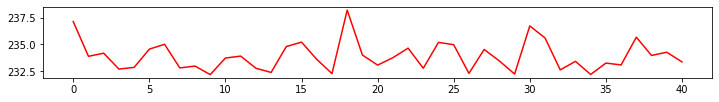

In [11]:
models=[Pipeline([('poly',PolynomialFeatures()),('linear',LinearRegression())])]

model = models[0]

X=datas[names[0:2]]
X=X.apply(lambda x :pd.Series(date_format(x)),axis=1)
Y=datas[names[4]]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

t=np.arange(len(X_test))
N = 5
d_pool = np.arange(1,N,1)
m = d_pool.size

clrs = []
for c in np.linspace(16711680,255,m):
    clrs.append('#%06d' % c)
line_width = 3

plt.figure(figsize=(12,6),facecolor='w')
for i,d in enumerate(d_pool):
    plt.subplot(N-1,1,i+1)
    plt.plot(t,Y_test,'r-',label=u'TD',ms=10,zorder=N)
    model.set_params(Poly__degree = d)
    model.fit(X_train,Y_train)
    lin = model.get_params('Linear')['Linear']
    output = u'%d,STEP,XS:'%d
    print(output,lin.coef_.ravel())
y_hat = model.predict(X_test)
s = model.score(X_test,Y_test)

z = N-1 if (d==2) else 0
label=u'%dST,TC=%.3f'(d,s)
plt.plot(t,y_hat, color=clrs[i], lw=line_width, alpha=0.75, label=label, zorder=z)
plt.legend(loc='upper left')
plt.grid(True)
plt.ylabel(u'%dST'%d,fontsize=12)

plt.legend(loc = 'lower right')
plt.suptitle(u'Txxhg&V:')
plt.grid(b=True)
plt.show()